In [509]:
import pandas as pd
import numpy as np
import requests

In [510]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [511]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler

In [512]:
url = 'https://municipaldata.treasury.gov.za/api/cubes/uifwexp/facts?cut=financial_year_end.year:2021|item.code:"unauthorised"'
r = requests.get(url)
r

<Response [200]>

In [513]:
json = r.json()
json

{'total_fact_count': 257,
 'data': [{'demarcation.code': 'BUF',
   'demarcation.label': 'Buffalo City',
   'item.code': 'unauthorised',
   'item.label': 'Unauthorised Expenditure',
   'financial_year_end.year': 2021,
   'amount': 0},
  {'demarcation.code': 'CPT',
   'demarcation.label': 'Cape Town',
   'item.code': 'unauthorised',
   'item.label': 'Unauthorised Expenditure',
   'financial_year_end.year': 2021,
   'amount': 0},
  {'demarcation.code': 'DC1',
   'demarcation.label': 'West Coast',
   'item.code': 'unauthorised',
   'item.label': 'Unauthorised Expenditure',
   'financial_year_end.year': 2021,
   'amount': 0},
  {'demarcation.code': 'DC10',
   'demarcation.label': 'Sarah Baartman',
   'item.code': 'unauthorised',
   'item.label': 'Unauthorised Expenditure',
   'financial_year_end.year': 2021,
   'amount': 0},
  {'demarcation.code': 'DC12',
   'demarcation.label': 'Amathole',
   'item.code': 'unauthorised',
   'item.label': 'Unauthorised Expenditure',
   'financial_year_end.y

In [514]:
json.keys()

dict_keys(['total_fact_count', 'data', 'cell', 'fields', 'order', 'page', 'page_size', 'status'])

In [515]:
json['data']

[{'demarcation.code': 'BUF',
  'demarcation.label': 'Buffalo City',
  'item.code': 'unauthorised',
  'item.label': 'Unauthorised Expenditure',
  'financial_year_end.year': 2021,
  'amount': 0},
 {'demarcation.code': 'CPT',
  'demarcation.label': 'Cape Town',
  'item.code': 'unauthorised',
  'item.label': 'Unauthorised Expenditure',
  'financial_year_end.year': 2021,
  'amount': 0},
 {'demarcation.code': 'DC1',
  'demarcation.label': 'West Coast',
  'item.code': 'unauthorised',
  'item.label': 'Unauthorised Expenditure',
  'financial_year_end.year': 2021,
  'amount': 0},
 {'demarcation.code': 'DC10',
  'demarcation.label': 'Sarah Baartman',
  'item.code': 'unauthorised',
  'item.label': 'Unauthorised Expenditure',
  'financial_year_end.year': 2021,
  'amount': 0},
 {'demarcation.code': 'DC12',
  'demarcation.label': 'Amathole',
  'item.code': 'unauthorised',
  'item.label': 'Unauthorised Expenditure',
  'financial_year_end.year': 2021,
  'amount': 0},
 {'demarcation.code': 'DC13',
  'de

In [516]:
type(json['data'][0])

dict

In [517]:
df = pd.DataFrame(json['data'])
df.head()

,demarcation.code,demarcation.label,item.code,item.label,financial_year_end.year,amount
0,BUF,Buffalo City,unauthorised,Unauthorised Expenditure,2021,0
1,CPT,Cape Town,unauthorised,Unauthorised Expenditure,2021,0
2,DC1,West Coast,unauthorised,Unauthorised Expenditure,2021,0
3,DC10,Sarah Baartman,unauthorised,Unauthorised Expenditure,2021,0
4,DC12,Amathole,unauthorised,Unauthorised Expenditure,2021,0


In [518]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   demarcation.code         257 non-null    object
 1   demarcation.label        257 non-null    object
 2   item.code                257 non-null    object
 3   item.label               257 non-null    object
 4   financial_year_end.year  257 non-null    int64 
 5   amount                   257 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 12.2+ KB


In [519]:
df.describe()

,financial_year_end.year,amount
count,257.0,2.570000e+02
mean,2021.0,7.956180e+07
std,0.0,1.985761e+08
min,2021.0,0.000000e+00
25%,2021.0,0.000000e+00
50%,2021.0,1.070302e+07
75%,2021.0,6.234384e+07
max,2021.0,1.430909e+09


In [520]:
df.isnull().sum()

demarcation.code           0
demarcation.label          0
item.code                  0
item.label                 0
financial_year_end.year    0
amount                     0
dtype: int64

In [521]:
df.columns

Index(['demarcation.code', 'demarcation.label', 'item.code', 'item.label',
       'financial_year_end.year', 'amount'],
      dtype='object')

In [522]:
#df = Encoder(df)
le = LabelEncoder()
df['demarcation.code'] = le.fit_transform(df['demarcation.code'])
df['item.code'] = le.fit_transform(df['item.code'])

In [523]:
df.head(15)

,demarcation.code,demarcation.label,item.code,item.label,financial_year_end.year,amount
0,0,Buffalo City,0,Unauthorised Expenditure,2021,0
1,1,Cape Town,0,Unauthorised Expenditure,2021,0
2,2,West Coast,0,Unauthorised Expenditure,2021,0
3,3,Sarah Baartman,0,Unauthorised Expenditure,2021,0
4,4,Amathole,0,Unauthorised Expenditure,2021,0
5,5,Chris Hani,0,Unauthorised Expenditure,2021,392410627
6,6,Joe Gqabi,0,Unauthorised Expenditure,2021,0
7,7,O R Tambo,0,Unauthorised Expenditure,2021,1197150
8,8,Xhariep,0,Unauthorised Expenditure,2021,1861390
9,9,Lejweleputswa,0,Unauthorised Expenditure,2021,2912252


In [524]:
df = df.drop(['demarcation.label', 'item.label'], axis=1)
df.head(15)

,demarcation.code,item.code,financial_year_end.year,amount
0,0,0,2021,0
1,1,0,2021,0
2,2,0,2021,0
3,3,0,2021,0
4,4,0,2021,0
5,5,0,2021,392410627
6,6,0,2021,0
7,7,0,2021,1197150
8,8,0,2021,1861390
9,9,0,2021,2912252


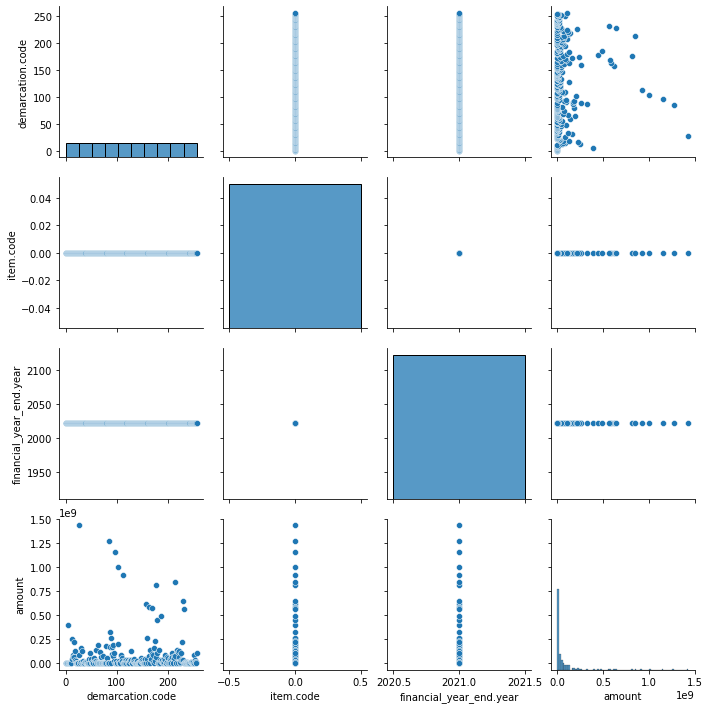

In [525]:
sns.pairplot(df)

<AxesSubplot:>

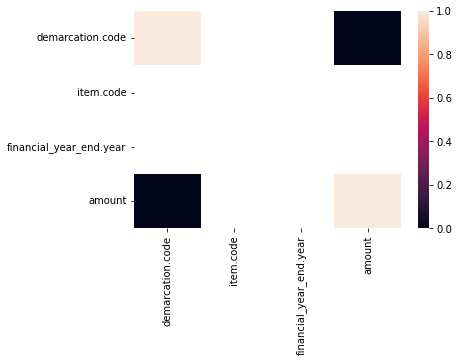

In [526]:
sns.heatmap(df.corr(), vmax=1)

In [531]:
y = df['amount']
X = df[['demarcation.code', 'item.code']]

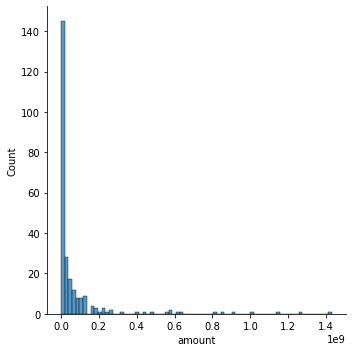

In [528]:
sns.displot(df['amount'])

<AxesSubplot:>

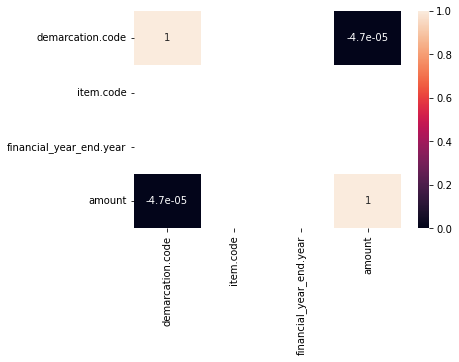

In [529]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='demarcation.code', ylabel='amount'>

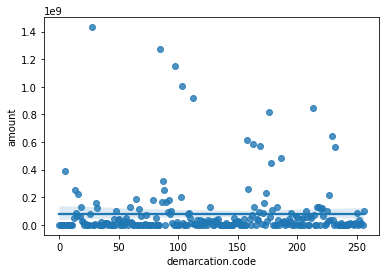

In [533]:
sns.regplot(x='demarcation.code',y='amount',data=df)